# Problem:
- Brest Cancer prediction
- DataSet : Inbuilt brest cancer dataset
- Model: SVC & Decision Tree

In [1]:
# Importing necessary module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = datasets.load_breast_cancer()
data

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# set Feature and target

X = df.drop(columns = 'target' , axis = 1)
y = df['target']

#Train test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

#Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Initializing model(Decision Tree)

clf1 = DecisionTreeClassifier (random_state = 42)
clf1.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Initializing model(Decision Tree)
clf2 = SVC (kernel = "linear", C = 1)
clf2.fit(X_train_scaled,y_train)

SVC(C=1, kernel='linear')

In [6]:
#Prediction
y_predict_dt = clf1.predict(X_test_scaled)
y_predict_svc = clf2.predict(X_test_scaled)

In [7]:
# Accuracy of Decission Tree
accuracy_dt = metrics.accuracy_score(y_test, y_predict_dt)
accuracy_svc = metrics.accuracy_score(y_test, y_predict_svc)


confusion_matrix_dt = metrics.confusion_matrix(y_test, y_predict_dt)
confusion_matrix_svc = metrics.confusion_matrix(y_test, y_predict_svc)


classification_report_dt = metrics.classification_report(y_test, y_predict_dt)
classification_report_svc = metrics.classification_report(y_test, y_predict_svc)


print(f'"Accuracy of Decisiontree is :",{accuracy_dt: .2f}')
print(f'"Accuracy of SVC is :",{accuracy_svc: .2f}')
print("Confusion Matrix of Decisiontree is :",confusion_matrix_dt)
print("Confusion Matrix of SVC is :",confusion_matrix_svc)
print("Classification Report of Decisiontree is :",classification_report_dt)
print("Classification Report of SVC is :",classification_report_svc)

"Accuracy of Decisiontree is :", 0.95
"Accuracy of SVC is :", 0.96
Confusion Matrix of Decisiontree is : [[40  3]
 [ 3 68]]
Confusion Matrix of SVC is : [[41  2]
 [ 3 68]]
Classification Report of Decisiontree is :               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Classification Report of SVC is :               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [10]:
# Principal Component Analysis
from sklearn.decomposition import PCA

In [11]:
#Redicing no . features  to 2
pca = PCA(n_components = 2 , random_state = 42)
X_train_pca = pca.fit_transform(X_train)

In [12]:
X_train_pca[: ,1]

array([-5.52649688e+01, -7.51061116e+01, -3.85839655e+01, -4.17768364e+01,
       -2.54401424e+01, -3.10893870e+01,  5.57410777e+01,  1.39692578e-01,
       -1.81259927e+00,  7.40116842e+01, -2.31634773e+00,  2.18141128e+01,
       -9.02001770e+01, -5.40417506e+01,  2.46474775e+01, -5.78278688e+01,
       -3.01100856e+02,  3.31312971e+01,  1.15815793e+01,  5.09320740e+00,
        3.12233482e+01, -1.13176990e+01,  2.35367440e+01, -2.17573015e+01,
        3.67809606e+01, -9.79057496e+01, -2.75423426e+01, -2.80688541e+02,
       -3.11660637e+01,  3.89371346e+01, -6.62240907e+01,  2.33936998e+01,
       -1.48198673e+01,  1.34543445e+02, -2.75572301e+00,  3.09999907e+01,
       -3.07009392e+01,  2.23707490e+01, -5.38002844e+01,  8.33611491e+00,
        1.41880554e+00, -4.69224345e+01,  1.44017951e+02, -8.55355058e+01,
        6.85550139e+01,  5.55617546e+00, -1.21426156e+01, -4.49327974e+01,
       -5.68615211e+01,  2.91081582e+01,  2.69515872e+01, -4.48997731e+01,
        3.91884816e+01,  

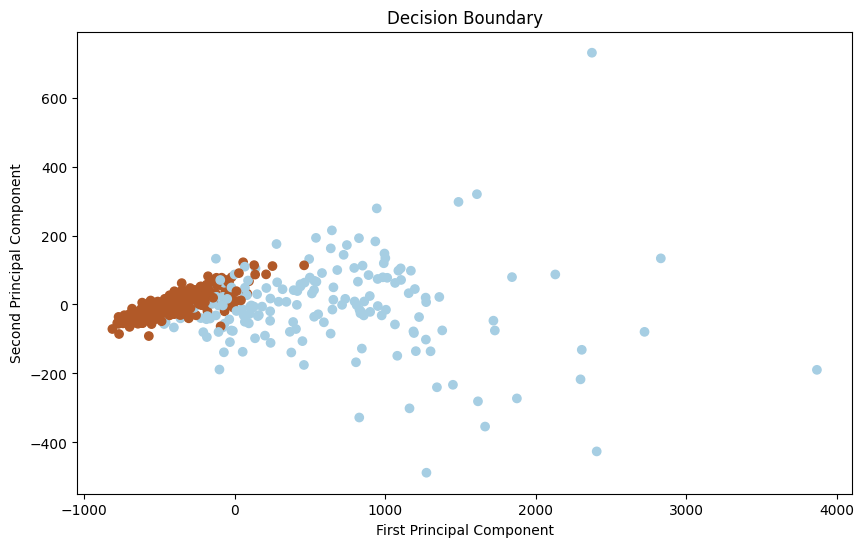

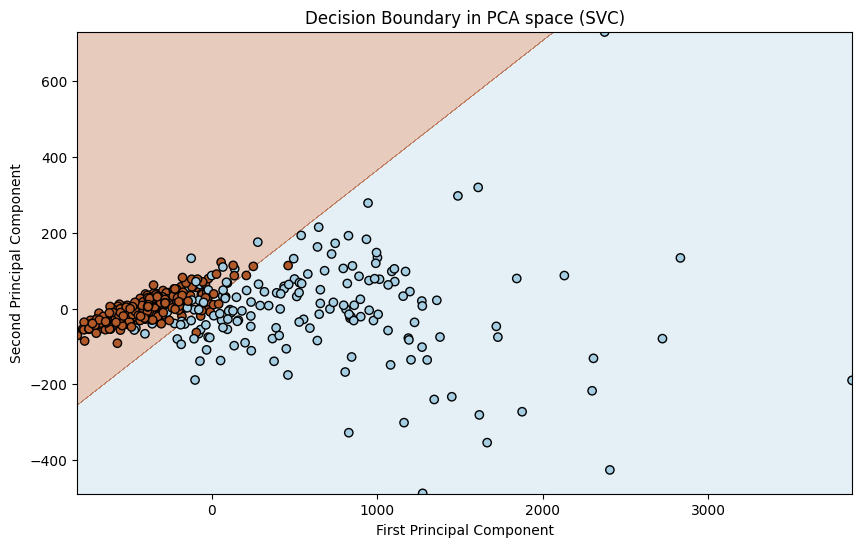

In [16]:
from sklearn.svm import SVC
clf_pca = SVC(kernel='linear', C=1)
clf_pca.fit(X_train_pca, y_train)

# Visualizing the class distribution and decision boundary
plt.figure(figsize  = (10,6))
plt.scatter(X_train_pca[:,0] , X_train_pca[: ,1], c = y_train ,  cmap=plt.cm.Paired)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary')
plt.show()


# Plotting decision boundary
h = 0.5
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary in PCA space (SVC)')
plt.show()